# Machine Learning Project: Predict Height using Linear Regression


### I came across this dataset that list the height and weight of people. I found this dataset name[Height_Weight_single_variable_data_101_series_1].In this project, we have to train our model on this data and then make a new weight prediction of the person given his height.

In [1]:
#importing liabraries
import pandas as pd
import numpy as np

In [2]:
#importing dataset
df=pd.read_csv("C:/Users/91708/Desktop/Height_Weight_single_variable_data_101_series_1.0.csv")

In [3]:
#definnig target variable
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [4]:
#Performing some basic EDA to understand data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  35 non-null     float64
 1   Height  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
df.shape

(35, 2)

In [6]:
df.head()

,Weight,Height
0,28.0,121.92
1,28.1,124.46
2,28.2,127.00
3,28.3,129.54
4,28.4,132.08


In [7]:
df.isnull().sum()  # Check for missing values

Weight    0
Height    0
dtype: int64

In [8]:
#Split dataset into training set and test set
#There are 35 entries in the dataset. Let’s take 20% of data as test data.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

### Fit Regression Model
We will first fit the Regression Model and see how good it fits the data. If the performance is not good —
then we can experiment with other Regression Models.

In [10]:
#Fit Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)


LinearRegression()

In [11]:
lin_pred = lin_reg.predict(X_test)
lin_pred

array([195.79170606, 172.24843663, 161.98066714, 192.99140529,
       177.43417879, 159.59522574, 146.42344064])

In [12]:
Y_test

array([195.58, 172.72, 162.56, 193.04, 177.8 , 160.02, 147.32])

# Evaluate performance of the Model


As we see from output that our predicted values are very close to the real values.

After we fit the model, we have to evaluate how well the model fits the data. 
For this purpose, we will look at “R squared” and Mean Squared Error.

# “R Squared”:
This value is between 0 and 1 i.e. between 0% and 100%. Generally speaking, in most cases — the closer it is to 1 — the better — 1 means perfect correlation. 
So if it is 1 (or 100%), the two variables are perfectly correlated

In [13]:
from sklearn import metrics
print('R square = ',metrics.r2_score(Y_test, lin_pred))

R square =  0.9990789472665881


# Mean Squared Error (MSE): 


This is the average of the square of errors. Error here implies the difference between the actual values and predicted values. We square each difference.
So if mean squared error is large, it means the error is large. The lower the value, the better the model. 
We can use the MSE value in selecting one model over the other.

In [14]:
print('Mean squared Error = ',metrics.mean_squared_error(Y_test, lin_pred))

Mean squared Error =  0.24617950090219523


We can see from the output below that R square is 0.99 that is 99% which is very good and mean squared error is also low.

# Visualize the training set

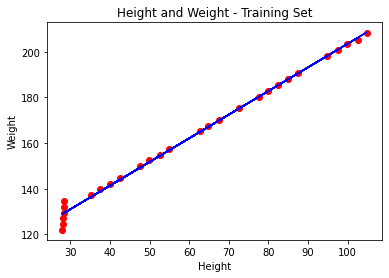

In [15]:
#Visualize Training set
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train, color="red")
plt.plot(X_train, lin_reg.predict(X_train), color="blue" )
plt.title("Height and Weight - Training Set")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

### We can see from the graph that apart from the few points at the bottom, the regression line fits other points pretty well.

# Visualize the test set

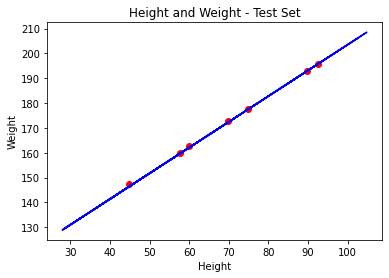

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_train, lin_reg.predict(X_train), color="blue" )
plt.title("Height and Weight - Test Set")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

# Make new prediction

In [20]:
lin_pred_new = lin_reg.predict([[60]])
print('If a person has weight 53, the predicted height is ',lin_pred_new)

If a person has weight 53, the predicted height is  [162.08438198]


# Conclusion

The prediction we got from Linear Regression model is very good based on the R Squared and Mean Squared Error. 
So there is no need for us to try other regression models.

# ***Finished simple project using Kaggle dataset.***

In [18]:
import pickle


In [19]:
# open a file, where you ant to store the data
file = open('linear_regresson_model.pkl', 'wb')

# dump information to that file
pickle.dump(lin_reg, file)